# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def findCategoricalCol(df):
    cols=[]
    for col in df.columns:
        if df[col].dtype == object:
            cols.append(col)
    return cols

In [4]:
h1b_data = pd.read_csv('h1b_kaggle.csv')
h1b_data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [5]:
len(h1b_data)

3002458

In [6]:
h1b_data.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [7]:
h1b_data=h1b_data.drop('Unnamed: 0',axis=1)

In [8]:
h1b_data

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...
3002453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


# Exploratory Data Analysis

In [9]:
h1b_data['CASE_STATUS'].value_counts(dropna=False)

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
NaN                                                        13
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [10]:

h1b_data.loc[h1b_data['CASE_STATUS'] == 'REJECTED', 'CASE_STATUS'] = 'DENIED'
h1b_data.loc[h1b_data['CASE_STATUS'] == 'INVALIDATED', 'CASE_STATUS'] = 'DENIED'
h1b_data.loc[h1b_data['CASE_STATUS'] == 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', 'CASE_STATUS'] = 'DENIED'
h1b_data.loc[h1b_data['CASE_STATUS'] == 'CERTIFIED-WITHDRAWN', 'CASE_STATUS'] = 'CERTIFIED'
h1b_data = h1b_data.drop(h1b_data[h1b_data['CASE_STATUS']=='WITHDRAWN'].index)

making it as a binary classification problem CAT1- Certified and CAT2: DENIED, transforming all the categories into the either Certified or Denied

In [11]:
h1b_data['CASE_STATUS'].value_counts(dropna=False)

CERTIFIED    2818282
DENIED         94364
NaN               13
Name: CASE_STATUS, dtype: int64

In [12]:
#removing the case_status null values as a very small percentage of data having null
h1b_data = h1b_data.drop(h1b_data[h1b_data['CASE_STATUS'].isnull()].index)

In [13]:
h1b_data['CASE_STATUS'].value_counts(dropna=False)

CERTIFIED    2818282
DENIED         94364
Name: CASE_STATUS, dtype: int64

In [14]:
h1b_data.isnull().sum()

CASE_STATUS                0
EMPLOYER_NAME             18
SOC_NAME               17073
JOB_TITLE                 10
FULL_TIME_POSITION         1
PREVAILING_WAGE           53
YEAR                       0
WORKSITE                   0
lon                   102844
lat                   102844
dtype: int64

In [15]:
h1b_data['PREVAILING_WAGE'].describe()

count    2.912593e+06
mean     1.428910e+05
std      5.282312e+06
min      0.000000e+00
25%      5.441300e+04
50%      6.500000e+04
75%      8.143200e+04
max      6.997607e+09
Name: PREVAILING_WAGE, dtype: float64

In [16]:
wage_median = h1b_data['PREVAILING_WAGE'].median()

In [17]:
h1b_data['PREVAILING_WAGE'] =  h1b_data['PREVAILING_WAGE'].fillna(wage_median)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AF7F3D648>]],
      dtype=object)

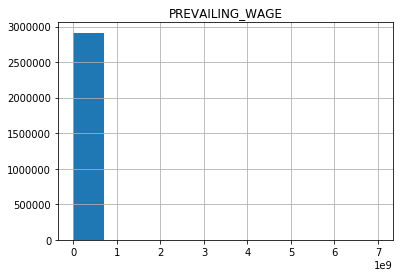

In [18]:
h1b_data[['PREVAILING_WAGE']].hist()

Looks to have too many outliers, the median of the data seems to be around 65k and most of the data is distributed to be aorund 40k to 80k USD

In [19]:
lower_bound = h1b_data['PREVAILING_WAGE'].quantile(0.05)

In [20]:
higher_bound = h1b_data['PREVAILING_WAGE'].quantile(0.95)

In [21]:
h1b_data['FULL_TIME_POSITION'] =h1b_data['FULL_TIME_POSITION'].fillna(h1b_data['FULL_TIME_POSITION'].mode()[0])

In [22]:
h1b_data['EMPLOYER_NAME'] =  h1b_data['EMPLOYER_NAME'].fillna(h1b_data['EMPLOYER_NAME'].mode()[0])

In [23]:
h1b_data['JOB_TITLE'] = h1b_data['JOB_TITLE'].fillna(h1b_data['JOB_TITLE'].mode()[0])

In [24]:
h1b_data = h1b_data.drop(['lon','lat'],axis=1) #to check this need the expert knowledge of the area, hence dropping

In [25]:
h1b_data

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,CERTIFIED,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,CERTIFIED,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
5,CERTIFIED,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA"
...,...,...,...,...,...,...,...,...
3002369,DENIED,"CUSTOMTBT, LLC",Instructional Coordinators,SENIOR INSTRUCTIONAL DESIGNER,Y,46738.0,2011.0,"MARIETTA, GEORGIA"
3002378,DENIED,"KEVIN PARK & ASSOCIATES, LTD",Accountants and Auditors,ACCOUNTANT,Y,45760.0,2011.0,"ARLINGTON HEIGHTS, ILLINOIS"
3002383,DENIED,IVERTIX INCORPORATED,Computer Programmers,APPLICATION DEVELOPER,Y,54080.0,2011.0,"WASHINGTON, DISTRICT OF COLUMBIA"
3002389,DENIED,"PROGRESSIVE SURFACE, INC.",Sales Engineers,SALES ENGINEER,Y,55141.0,2011.0,"GRAND RAPIDS, MICHIGAN"


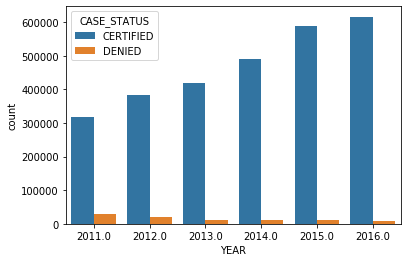

In [26]:
sns.countplot('YEAR',data=h1b_data,hue='CASE_STATUS')

The number of certified cases fo H1b visa have been increasing from the year 2011 and the % of denial is decreasing

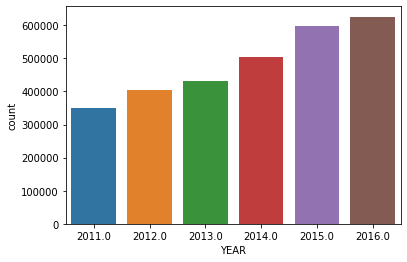

In [27]:
sns.countplot('YEAR',data=h1b_data)

In [28]:
h1b_data['SOC_NAME'] = h1b_data['SOC_NAME'].fillna(h1b_data['SOC_NAME'].mode()[0])

In [29]:
h1b_data.isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
dtype: int64

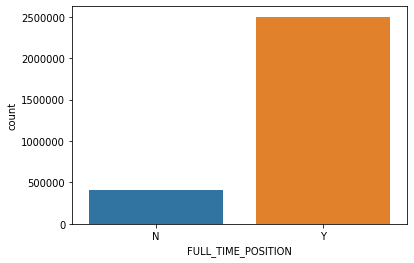

In [30]:
sns.countplot('FULL_TIME_POSITION',data=h1b_data)

Majority of the people who applied for h1b Visa petition were in a full time role

In [31]:
h1b_data['STATE'] = h1b_data['WORKSITE'].apply(lambda x: x.split(', ')[1])

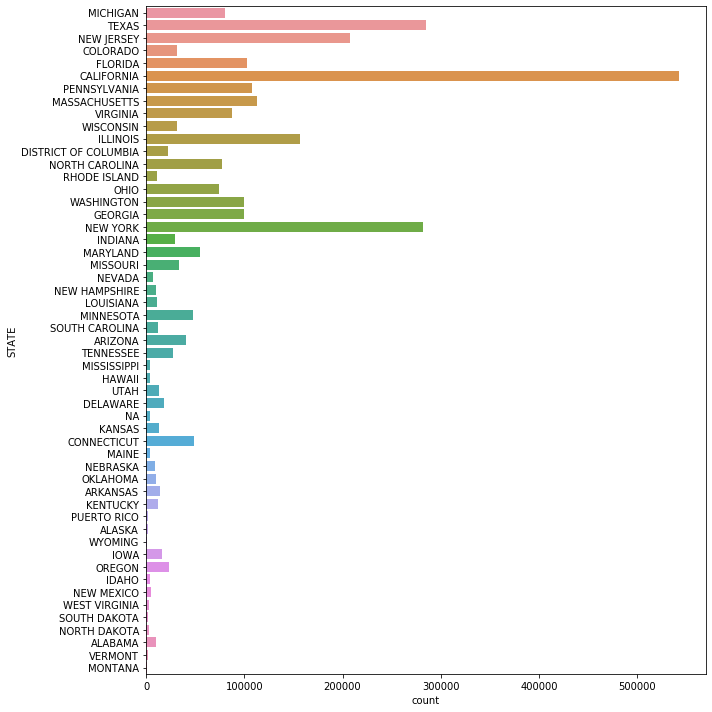

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(y=h1b_data['STATE'])
plt.tight_layout()

Places from where the maximum filings have been done are California, followed by Texas and NewYork. It seems to be the IT hub. Discarding cities as then there would be too many categories for a particular state.

In [33]:
h1b_data['EMPLOYER_NAME'].value_counts()

INFOSYS LIMITED                      130335
TATA CONSULTANCY SERVICES LIMITED     64418
WIPRO LIMITED                         47497
DELOITTE CONSULTING LLP               36675
ACCENTURE LLP                         33316
                                      ...  
LUCKY MONEY INC                           1
SAMARAH INVESTMENTS LLC                   1
OPUS HEALTHCARE SOLUTIONS LLC             1
WC FIELD HOCKEY, INC                      1
QA ENGINEER INC                           1
Name: EMPLOYER_NAME, Length: 234089, dtype: int64

In [34]:
h1b_data[h1b_data['EMPLOYER_NAME'].str.contains('UNIVERSITY')]

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE
0,CERTIFIED,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",MICHIGAN
23,CERTIFIED,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,99986.0,2016.0,"CHULA VISTA, CALIFORNIA",CALIFORNIA
74,CERTIFIED,UNIVERSITY AT ALBANY,CHIEF EXECUTIVES,DIRECTOR,Y,75293.0,2016.0,"ALBANY, NEW YORK",NEW YORK
298,CERTIFIED,"UNIVERSITY OF CALIFORNIA, LOS ANGELES",CHIEF EXECUTIVES,ASSO. VICE CHANCELLOR FOR INTEL. PROP. AND IND...,Y,91312.0,2016.0,"LOS ANGELES, CALIFORNIA",CALIFORNIA
300,CERTIFIED,YALE UNIVERSITY,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,195208.0,2016.0,"NEW HAVEN, CONNECTICUT",CONNECTICUT
...,...,...,...,...,...,...,...,...,...
3002264,CERTIFIED,CARNEGIE MELLON UNIVERSITY,"Physical Scientists, All Other",POSTDOCTORAL RESEARCH ASSOCIATE,Y,41330.0,2011.0,"PITTSBURGH, PENNSYLVANIA",PENNSYLVANIA
3002270,CERTIFIED,"UNIVERSITY OF CALIFORNIA, LOS ANGELES","Medical Scientists, Except Epidemiologists",POSTDOCTORAL SCHOLAR,Y,42864.0,2011.0,"LOS ANGELES, CALIFORNIA",CALIFORNIA
3002278,CERTIFIED,RESEARCH CORPORATION OF THE UNIVERSITY OF HAWAII,Biological Technicians,DNA LAB TECHNICIAN,Y,28080.0,2011.0,"HILO, HAWAII",HAWAII
3002364,DENIED,"UNIVERSITY OF CALIFORNIA, SANTA CRUZ",Biochemists and Biophysicists,POSTDOCTORAL SCHOLAR,Y,38496.0,2011.0,"SANTA CRUZ, CALIFORNIA",CALIFORNIA


In [35]:
h1b_data[~h1b_data['EMPLOYER_NAME'].str.contains('UNIVERSITY')]

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE
1,CERTIFIED,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",TEXAS
2,CERTIFIED,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",NEW JERSEY
3,CERTIFIED,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",COLORADO
5,CERTIFIED,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA",FLORIDA
6,CERTIFIED,BT AND MK ENERGY AND COMMODITIES,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021.0,2016.0,"HOUSTON, TEXAS",TEXAS
...,...,...,...,...,...,...,...,...,...
3002369,DENIED,"CUSTOMTBT, LLC",Instructional Coordinators,SENIOR INSTRUCTIONAL DESIGNER,Y,46738.0,2011.0,"MARIETTA, GEORGIA",GEORGIA
3002378,DENIED,"KEVIN PARK & ASSOCIATES, LTD",Accountants and Auditors,ACCOUNTANT,Y,45760.0,2011.0,"ARLINGTON HEIGHTS, ILLINOIS",ILLINOIS
3002383,DENIED,IVERTIX INCORPORATED,Computer Programmers,APPLICATION DEVELOPER,Y,54080.0,2011.0,"WASHINGTON, DISTRICT OF COLUMBIA",DISTRICT OF COLUMBIA
3002389,DENIED,"PROGRESSIVE SURFACE, INC.",Sales Engineers,SALES ENGINEER,Y,55141.0,2011.0,"GRAND RAPIDS, MICHIGAN",MICHIGAN


In [36]:
#2 categories can be formed - University_Filing and Company_Filing
h1b_data['EMPLOYER_NAME'] = h1b_data['EMPLOYER_NAME'].apply(lambda x: x.lower())

In [37]:
h1b_data["EMPLOYER"] = h1b_data['EMPLOYER_NAME'].apply(lambda x : 'University_Filing' if 'university' in x else 'Company_Filing')

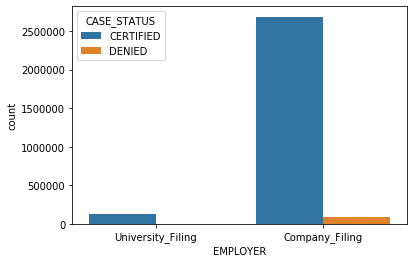

In [38]:
sns.countplot('EMPLOYER',data=h1b_data,hue='CASE_STATUS')

In [39]:
h1b_data.groupby('EMPLOYER')['CASE_STATUS'].value_counts(normalize=True)

EMPLOYER           CASE_STATUS
Company_Filing     CERTIFIED      0.967384
                   DENIED         0.032616
University_Filing  CERTIFIED      0.972018
                   DENIED         0.027982
Name: CASE_STATUS, dtype: float64

More chances of getting accepted if a university has filed for the H1b visa petition

Removal of the outliers from the wage column.

In [40]:
h1b_data = h1b_data[(h1b_data['PREVAILING_WAGE']>lower_bound ) & (h1b_data['PREVAILING_WAGE'] < higher_bound)]

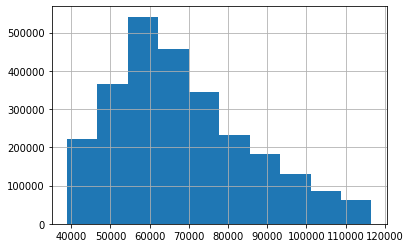

In [41]:
h1b_data['PREVAILING_WAGE'].hist()

In [42]:
h1b_data['CASE_STATUS'].value_counts(normalize=True)

CERTIFIED    0.971763
DENIED       0.028237
Name: CASE_STATUS, dtype: float64

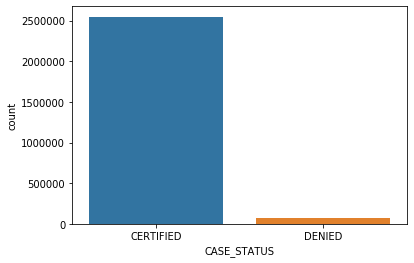

In [43]:
sns.countplot('CASE_STATUS',data=h1b_data)

Appears to be a highly imbalanced dataset as almost 97% of the data is certified and only 2% comprise of the denied status, that can led to the biasness of the model.

In [44]:
h1b_data.SOC_NAME.value_counts()

Computer Systems Analysts                            299583
Computer Programmers                                 217215
COMPUTER SYSTEMS ANALYSTS                            206138
SOFTWARE DEVELOPERS, APPLICATIONS                    195451
Software Developers, Applications                    177766
                                                      ...  
SALES REPRESENTATIVE                                      1
SECURITIES, COMMODITIES, AND FINANCIAL SERVICES S         1
MANGEMENT ANALYSTS                                        1
SECURITIES, COMMODITIES, AND FINANCIAL                    1
Prepress Technicians and Workers                          1
Name: SOC_NAME, Length: 1805, dtype: int64

Upon observation, there are repetitions of the same category in the different cases (Upper case, lower case of the same occupation), can be a human error during entry, hence to avoid, the SOC_NAME can be divided into sectors of occupation.

In [45]:
h1b_data['SOC_NAME']=h1b_data['SOC_NAME'].apply(lambda x:x.lower())

In [46]:
h1b_data['SECTOR'] = np.nan
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('computer','programmer')] = 'computer'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('software','web developer')] = 'computer'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('database')] = 'computer'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('math','statistic')] = 'Mathematical'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('predictive model','stats')] = 'Mathematical'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('teacher','linguist')] = 'Education'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('professor','Teach')] = 'Education'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('school principal')] = 'Education'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('medical','doctor')] = 'Medical'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('physician','dentist')] = 'Medical'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('Health','Physical Therapists')] = 'Medical'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('surgeon','nurse')] = 'Medical'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('psychiatr')] = 'Medical'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('chemist','physicist')] = 'Advance Sciences'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('biology','scientist')] = 'Advance Sciences'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('biologi','clinical research')] = 'Advance Sciences'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('public relation','manage')] = 'Management'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('management','operation')] = 'Management'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('chief','plan')] = 'Management'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('executive')] = 'Management'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('advertis','marketing')] = 'Marketing'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('promotion','market research')] = 'Marketing'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('business','business analyst')] = 'Business'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('business systems analyst')] = 'Business'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('accountant','finance')] = 'Financial'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('financial')] = 'Financial'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('engineer','architect')] = 'Architecture & Engineering'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('surveyor','carto')] = 'Architecture & Engineering'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('technician','drafter')] = 'Architecture & Engineering'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('information security','information tech')] = 'Architecture & Engineering'
h1b_data.SECTOR = h1b_data.SECTOR.replace(np.NaN,'Others')

In [47]:
h1b_data.SECTOR.value_counts(dropna=False)

computer                      1667385
Others                         338356
Architecture & Engineering     277003
Financial                      113184
Management                      68342
Medical                         50821
Education                       49974
Advance Sciences                37596
Business                        13233
Marketing                        2256
Mathematical                     1886
Name: SECTOR, dtype: int64

In [48]:
len(h1b_data.JOB_TITLE.unique())

243479

Too many uniques values to be processed and the sector column would suffice for the Job title columns, hence can be dropped

In [49]:
h1b_data.dtypes

CASE_STATUS            object
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE               object
STATE                  object
EMPLOYER               object
SECTOR                 object
dtype: object

In [50]:
h1b_data = h1b_data.drop(['EMPLOYER_NAME','JOB_TITLE','WORKSITE','SOC_NAME'],axis=1)

In [51]:
h1b_data.dtypes

CASE_STATUS            object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                  float64
STATE                  object
EMPLOYER               object
SECTOR                 object
dtype: object

In [52]:
categorical_var = findCategoricalCol(h1b_data)

In [53]:
categorical_var

['CASE_STATUS', 'FULL_TIME_POSITION', 'STATE', 'EMPLOYER', 'SECTOR']

In [54]:
dummy = pd.get_dummies(h1b_data[categorical_var], drop_first=True)

In [55]:
h1b_data_df = pd.concat([h1b_data.drop(categorical_var,axis=1),dummy],axis=1)

# Under Sampling for Imbalanced Dataset

In [56]:
from imblearn.under_sampling import NearMiss
X = h1b_data_df.drop('CASE_STATUS_DENIED',axis=1)
y = h1b_data_df['CASE_STATUS_DENIED']

In [57]:
nm = NearMiss(random_state=42)
X_samp,y_samp = nm.fit_sample(X,y)

In [58]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_samp)))

Original dataset shape Counter({0: 2546055, 1: 73981})
Resampled dataset shape Counter({0: 73981, 1: 73981})


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.3, random_state=42)

# Model Creation

### 1. RandomForestClassifier

In [60]:
param_grid = { 
    'n_estimators': [300, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rc =RandomForestClassifier(random_state=42)
gcv = GridSearchCV(estimator=rc, param_grid=param_grid, cv=7,verbose=1, n_jobs=-1)
gcv.fit(X_train,y_train)

Fitting 7 folds for each of 12 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed: 37.7min finished


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [62]:
print(gcv.best_params_)

predictions =gcv.predict(X_test)

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 400}


In [63]:
from sklearn.metrics import classification_report,confusion_matrix
print('<==========Classification Report ========>')
print(classification_report(y_test, predictions))
print('<==========Confusion Matrix ========>')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22199
           1       1.00      0.98      0.99     22190

    accuracy                           0.99     44389
   macro avg       0.99      0.99      0.99     44389
weighted avg       0.99      0.99      0.99     44389



[[22145    54]
 [  394 21796]]


In [64]:
print("Training Accuracy:{:.2f}%".format(gcv.score(X_train,y_train)*100))
print("Testing Accuracy:{:.2f}%".format(gcv.score(X_test,y_test)*100))

Training Accuracy:99.14%
Testing Accuracy:98.99%


### 2. Logistic Regression 

In [65]:
param_log_grid = {
    'C' :[0.01,0.1,1],
    'solver' :['liblinear']
}

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
lr = LogisticRegression(random_state=42)
skf = StratifiedKFold(n_splits=5,random_state=42)
gcv_log = GridSearchCV(estimator=lr, param_grid=param_log_grid, cv=skf, verbose=1, n_jobs=-1)
gcv_log.fit(X_train,y_train)
print(gcv_log.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.5s finished


{'C': 1, 'solver': 'liblinear'}


In [67]:
print("Training Accuracy {:.2f}%".format(gcv_log.score(X_train,y_train)*100))
print("Test Accuracy {:.2f}%".format(gcv_log.score(X_test,y_test)*100))


Training Accuracy 87.35%
Test Accuracy 87.49%


In [68]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_score = nb.score(X_test,y_test)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb_score*100))

Accuracy of Naive Bayes: 92.36%


In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
classifiers = [RandomForestClassifier(random_state=42,criterion='gini',max_features='auto',n_estimators=400),
              LogisticRegression(random_state=42, C=1,solver='liblinear'),
              GaussianNB()]

In [72]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for classifier in classifiers:
    model = classifier.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':classifier.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [74]:
result_table = result_table.set_index('classifiers')

In [77]:
result_table.index.tolist()

['RandomForestClassifier', 'LogisticRegression', 'GaussianNB']

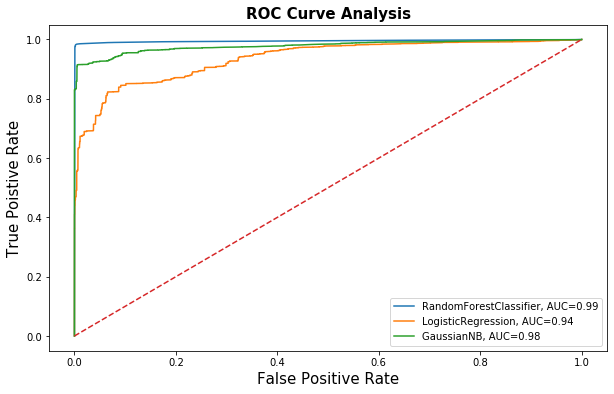

In [97]:
plt.figure(figsize=(10,6))
for model in result_table.index.tolist():
    plt.plot(result_table.loc[model]['fpr'],
             result_table.loc[model]['tpr'],
             label= '{}, AUC={:.2f}'.format(model, result_table.loc[model]['auc']))
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Poistive Rate', fontsize =15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend()